# Aplicando Análise de Dados ao Marketing.
Autor: João Trajano de Souza Neto.

# Sobre o Trabalho.

O objetivo geral deste trabalho é: empregar a análise e mineração de dados, nos processos de extração do conhecimento na área do marketing. Para atingir este objetivo geral, os objetivos específicos são conhecer os processos de negócios que envolvem o marketing; analisar os dados, testando hipóteses á possíveis padrões em meio a esses dados, usando o framework Pandas; criar modelos de visualização destes dados, usando Matplotilib e Seaborn e, criar um modelo preditivo usando o Scikit-Learn, usando o método de aprendizagem supervisionada.

A base dados usada para o andamento deste estudo, pode ser acessada através do site Kaggle: https://www.kaggle.com/rodsaldanha/arketing-campaign

In [1]:
# -- importando as bibliotecas necessárias.

import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

%matplotlib inline 

In [129]:
camping_marketing = pd.read_excel('../marketing_campaign.xlsx') # -- importando a base de dados.

# Informações Básicas

In [3]:
camping_marketing.head(10) # -- Seleciona as dez primeiras linhas do dataset 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
camping_marketing.info() # -- Retornando o número de linhas e colunas, e o tipo de dado de cada coluna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [5]:
camping_marketing.describe() # -- Mostrando informações de cunho estatístico das informações de cada coluna.

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Análise dos Dados

- Preenchendo valores nulos da coluna Income, pela média da coluna inteira

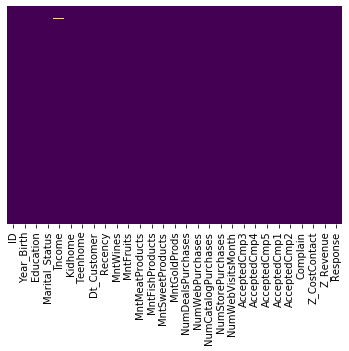

In [6]:
# mostrando campos com valores nulos
sbn.heatmap(camping_marketing.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# função que substitui os valores nulos pela média da coluna Income
def preencher_valor_medio(col):
    income = col[0]
    media = camping_marketing['Income'].mean()
    
    if np.isnan(income):   
        return media
    else:
        return income

In [8]:
# aplicando a função preencher_valor_medio
camping_marketing['Income'] = camping_marketing[['Income']].apply(preencher_valor_medio, axis=1) 

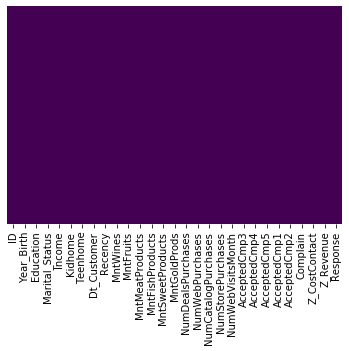

In [9]:
# agora não tem valores nulos na coluna Income
# podendo agora trabalhar sem grandes dificuldades

sbn.heatmap(camping_marketing.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# Afim de evitar erros envolvendo espaços na coluna Education
def retirar_espaco(col):
    
    education = col[0]
    
    if education == '2n Cycle':
        education = education.replace(' ', '')
        return education.replace(' ', '')
    else:
        return education

In [11]:
camping_marketing['Education'] = camping_marketing[['Education']].apply(retirar_espaco,axis=1)

- Contando o número de aceitações das campnhas, usando countplor do Seaborn

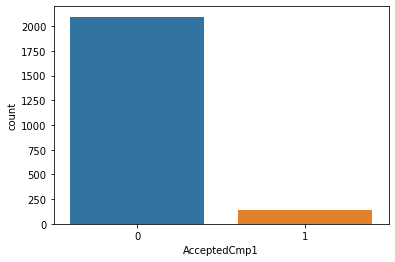

In [12]:
sbn.countplot(x='AcceptedCmp1', data=camping_marketing)

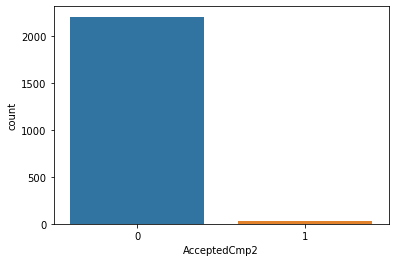

In [13]:
sbn.countplot(x='AcceptedCmp2', data=camping_marketing)

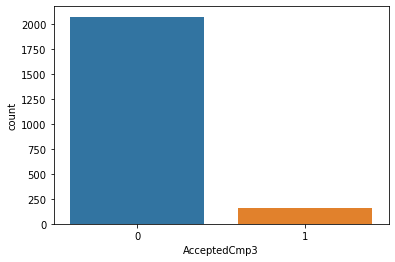

In [14]:
sbn.countplot(x='AcceptedCmp3', data=camping_marketing)

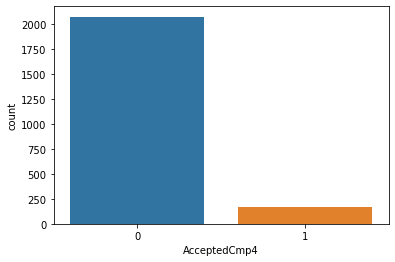

In [15]:
sbn.countplot(x='AcceptedCmp4', data=camping_marketing)

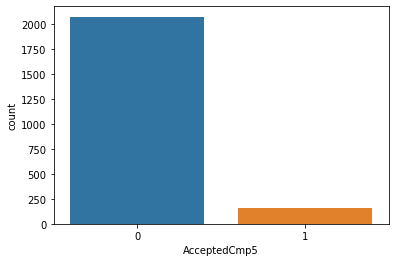

In [16]:
sbn.countplot(x='AcceptedCmp5', data=camping_marketing)

- Montando um histograma, contando a frequência dos anos de nascimento de cliente

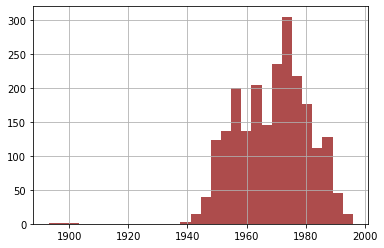

In [17]:
camping_marketing['Year_Birth'].hist(bins=30,color='darkred',alpha=0.7)

- Montando um histograma, contando a frequência dos níveis de gradução dos clientes

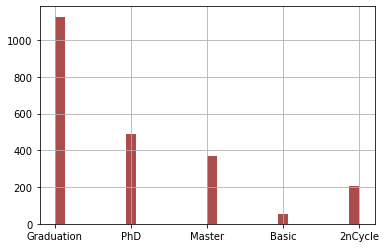

In [18]:
camping_marketing['Education'].hist(bins=30,color='darkred',alpha=0.7)

- Montando um gráfico de barras, com a quantidade de clientes por gradução que aceitaram cada campanha

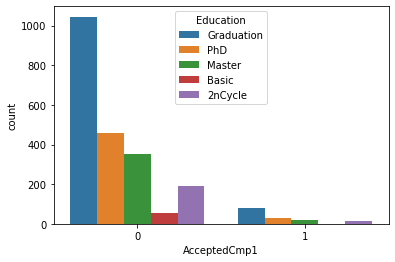

In [19]:
sbn.countplot(x='AcceptedCmp1', hue='Education', data=camping_marketing)

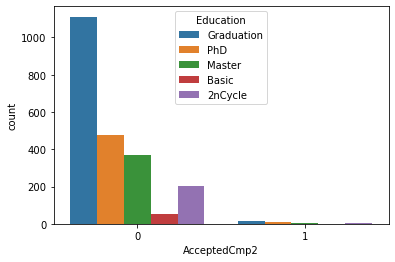

In [20]:
sbn.countplot(x='AcceptedCmp2', hue='Education', data=camping_marketing)

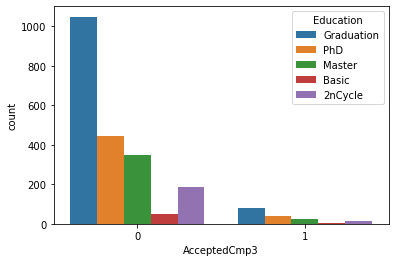

In [21]:
sbn.countplot(x='AcceptedCmp3', hue='Education', data=camping_marketing)

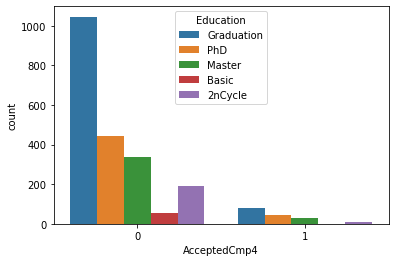

In [22]:
sbn.countplot(x='AcceptedCmp4', hue='Education', data=camping_marketing)

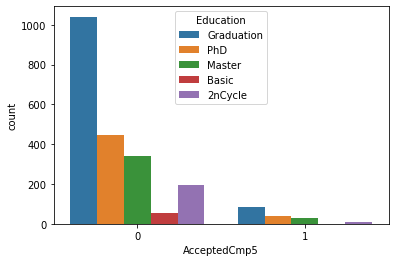

In [23]:
sbn.countplot(x='AcceptedCmp5', hue='Education', data=camping_marketing)

- Montando um gráfico de barras, com a quantidade de clientes por estado civil que aceitaram cada campanha

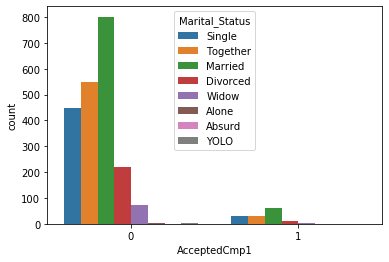

In [24]:
sbn.countplot(x='AcceptedCmp1', hue='Marital_Status', data=camping_marketing)

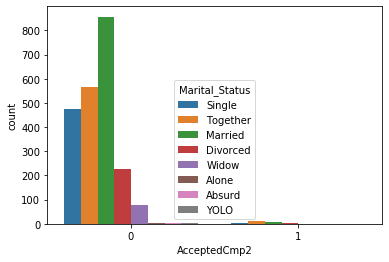

In [25]:
sbn.countplot(x='AcceptedCmp2', hue='Marital_Status', data=camping_marketing)

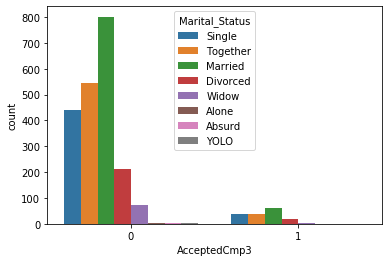

In [26]:
sbn.countplot(x='AcceptedCmp3', hue='Marital_Status', data=camping_marketing)

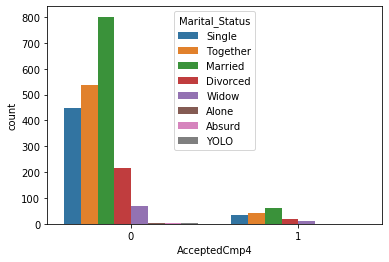

In [27]:
sbn.countplot(x='AcceptedCmp4', hue='Marital_Status', data=camping_marketing)

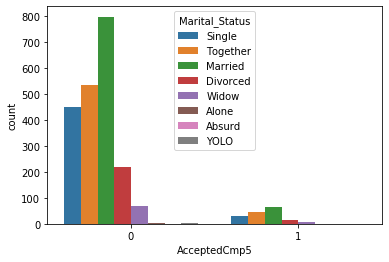

In [28]:
sbn.countplot(x='AcceptedCmp5', hue='Marital_Status', data=camping_marketing)

- Montando um gráfico de barras, com a quantidade de números de visitas

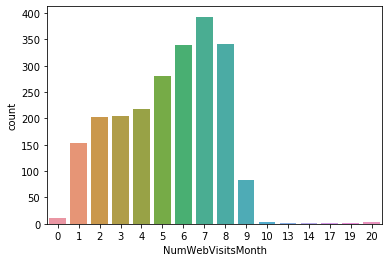

In [29]:
sbn.countplot(x='NumWebVisitsMonth', data=camping_marketing)

- Nesta parte, estára sendo feita uma série de funções e montagem de gráficos

In [134]:
# função que retorna um array contendo um dicionário, 
# contendo as porcentagens de aceitação pra cada campanha.
def porcentagem_campanha(col):
    
    cont_aceitou = 0
    cont_nao_aceitou = 0
    array = []
    total = col.count()
    
    for x in col:
        if x == 1:
            cont_aceitou = cont_aceitou + 1
        else:
            cont_nao_aceitou = cont_nao_aceitou + 1
    
    percent_aceitou = (cont_aceitou / total) * 100
    percent_nao_aceitou = (cont_nao_aceitou / total) * 100
    
    array_dict = dict({'Porcentagem de pessoas que aceitaram':percent_aceitou , 
                              'Porcentagem de pessoas que não aceitaram':percent_nao_aceitou})
    return array_dict

In [133]:
dicionario = dict()

for i in range(1,6):
    dicionario['AcceptedCmp{}'.format(i)] = porcentagem_campanha(camping_marketing['AcceptedCmp{}'.format(i)])

In [135]:
dataFrame_AcceptedCmp_percent = pd.DataFrame(dicionario) 

In [136]:
dataFrame_AcceptedCmp_percent # dataframe contendo as porcentagens

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Porcentagem de pessoas que aceitaram,6.428571,1.339286,7.276786,7.455357,7.276786
Porcentagem de pessoas que não aceitaram,93.571429,98.660714,92.723214,92.544643,92.723214


In [137]:
from matplotlib.pyplot import figure # importando as bibliotecas

In [138]:
# função que cria um gráfico de barras genéricos

def criar_grafico(linha, arrayListColumns,dataframe, percent):
    arrayList_values = []
    cont = 0
    fig, axs = plt.subplots(figsize=(12,9))
    
    for i in arrayListColumns:
        arrayList_values.append(dataframe[i][linha])
  
    labels_AcceptedCmp = [i for i in arrayListColumns]

    react = axs.bar(labels_AcceptedCmp,arrayList_values, tick_label=labels_AcceptedCmp)
    
    for r in react:
        height = r.get_height()
        if(percent):
            axs.annotate('{:.2f}%'.format(height),xy =(r.get_x() + r.get_width() / 2, height),
                         xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
        else:
            axs.annotate('{}'.format(height),xy =(r.get_x() + r.get_width() / 2, height),
                         xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')

In [36]:
columns_AcceptedCmp = dataFrame_AcceptedCmp_percent.columns

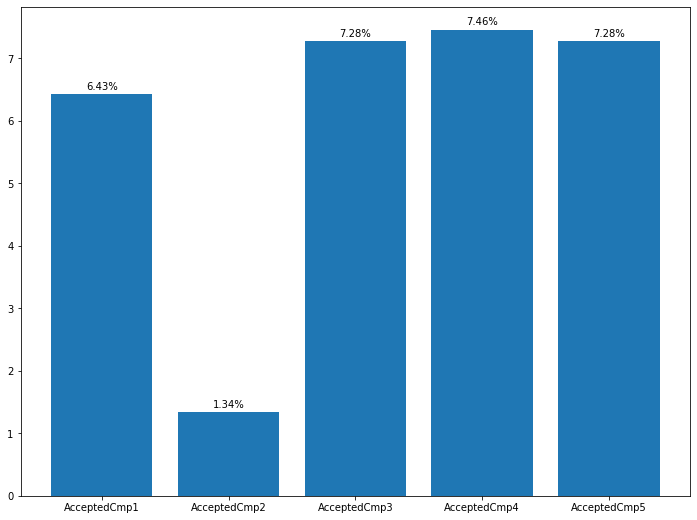

In [139]:
# Porcentagem de pessoas que aceitaram
criar_grafico(0,columns_AcceptedCmp,dataFrame_AcceptedCmp_percent, percent = True) 

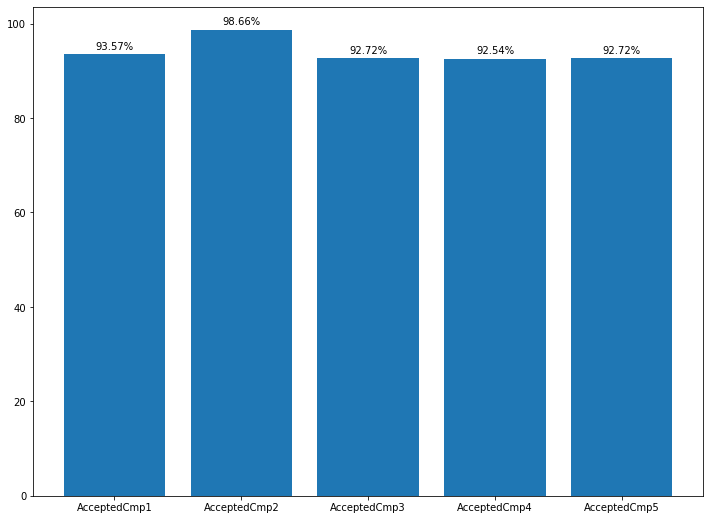

In [140]:
# Porcentagem de pessoas que não aceitaram
criar_grafico(1,columns_AcceptedCmp,dataFrame_AcceptedCmp_percent, percent = True) 

In [141]:
array_data_frame = []

# gera um dataframe agrupado, para montar gráficos de aceitação por gradução, para cada campanha
def gerar_dataframe_agrupado(camping, campo):
    dicionario_temp = dict()
    arrayListEducation_dict = dict()
    arrayListEducation = []
    array_dict = []
    array_final = dict()
    
    camping_marketing_agrupado = camping_marketing.groupby([campo])[camping]
    
    for i, rows in camping_marketing_agrupado:
        dicionario_temp[i] = rows
        arrayListEducation.append(i)
        
    for education in arrayListEducation:
        array = []
    
        for x in dicionario_temp[education]:
            array.append(x)
        
        arrayListEducation_dict[education] = array
        
    for x in arrayListEducation_dict:
        cont_not = 0
        cont = 0
    
        for j in arrayListEducation_dict[x]:
            total = np.size(arrayListEducation_dict[x])
        
            if j == 0:
                cont_not = cont_not + 1
            else:
                cont = cont + 1
                
        total = cont_not + cont
        percentual_aceitou =  (cont / total) * 100
        percentual_nao_aceitou =  (cont_not / total) * 100

        array_final[x] = dict({'Não Aceitou':percentual_nao_aceitou , 'Aceitou': percentual_aceitou})
        
    return pd.DataFrame(array_final)

In [142]:
# Função que irá criar o gráfico
def criar_grafico_por_education(dataFrame, columns_AcceptedCmp, cont):
    
    cont_nao_aceitou = 0
    cont_aceitou = 0
    
    labels_AcceptedCmp = [i for i in columns_AcceptedCmp]
    array_nao_aceitou = []
    array_aceitou = []
    
    x = np.arange(len(labels_AcceptedCmp))
    
    for i in labels_AcceptedCmp:
        array_nao_aceitou.append(dataFrame[i]['Não Aceitou'])
    
    for i in labels_AcceptedCmp:
        array_aceitou.append(dataFrame[i]['Aceitou'])

    fig, ax = plt.subplots(figsize=(10,10))
        
    nao_aceitou = ax.bar(labels_AcceptedCmp,array_nao_aceitou, label = 'Não aceitou')
    aceitou = ax.bar(labels_AcceptedCmp,array_aceitou, label = 'Aceitou')
    
    for rect in nao_aceitou:
        height = rect.get_height()
        
        ax.annotate('{:.2f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
        
    for rect in aceitou:
        height = rect.get_height()
        ax.annotate('{:.2f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    ax.set_ylabel('Porcentagem')
    ax.set_title('Porcentagem de Aceitação das Campanhas por Graduação.(AcceptedCmp{})'.format(cont))
    ax.set_xticks(x)
    ax.set_xticklabels(labels_AcceptedCmp)
    ax.legend()

    fig.tight_layout()

In [144]:
campo = 'Education'

# cada daframe gerado, irá adicionar no array array_data_frame
# para cada indice, um dataframe
for i in range(1,6):
    array_data_frame.append(gerar_dataframe_agrupado('AcceptedCmp{}'.format(i), campo))

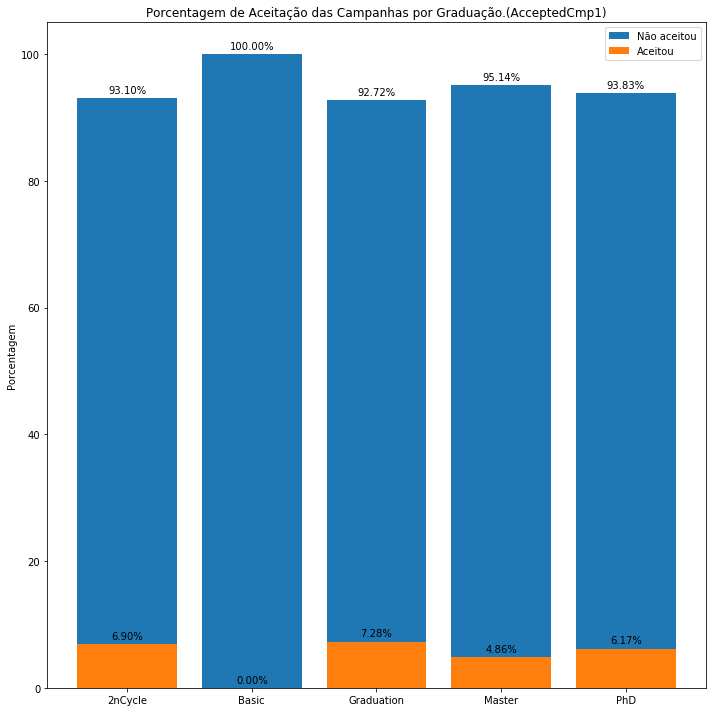

In [42]:
criar_grafico_por_education(array_data_frame[0], array_data_frame[0].columns, 1)

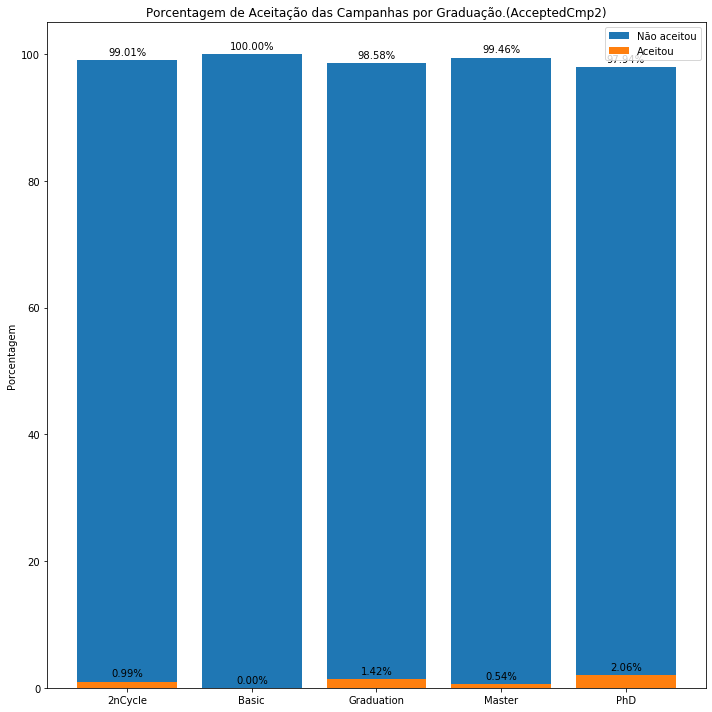

In [43]:
criar_grafico_por_education(array_data_frame[1], array_data_frame[1].columns, 2)

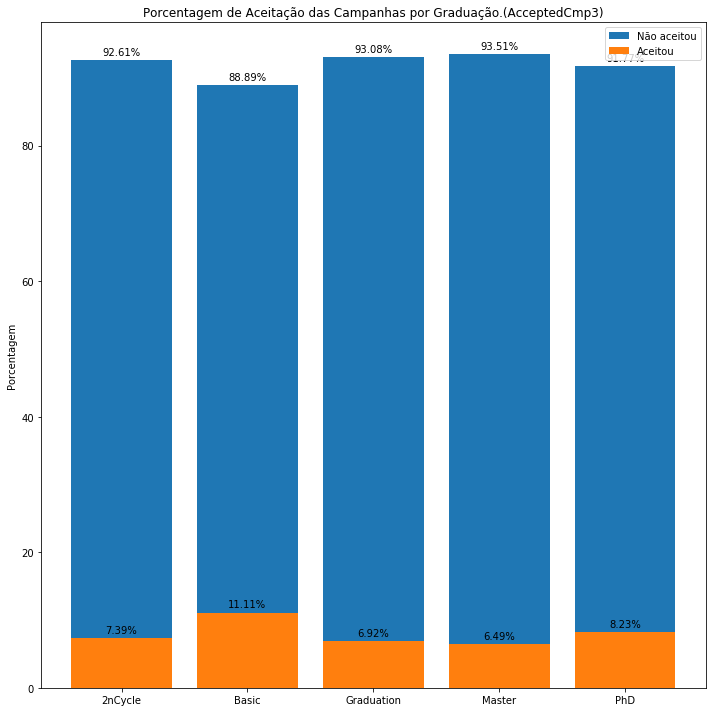

In [44]:
criar_grafico_por_education(array_data_frame[2], array_data_frame[2].columns, 3)

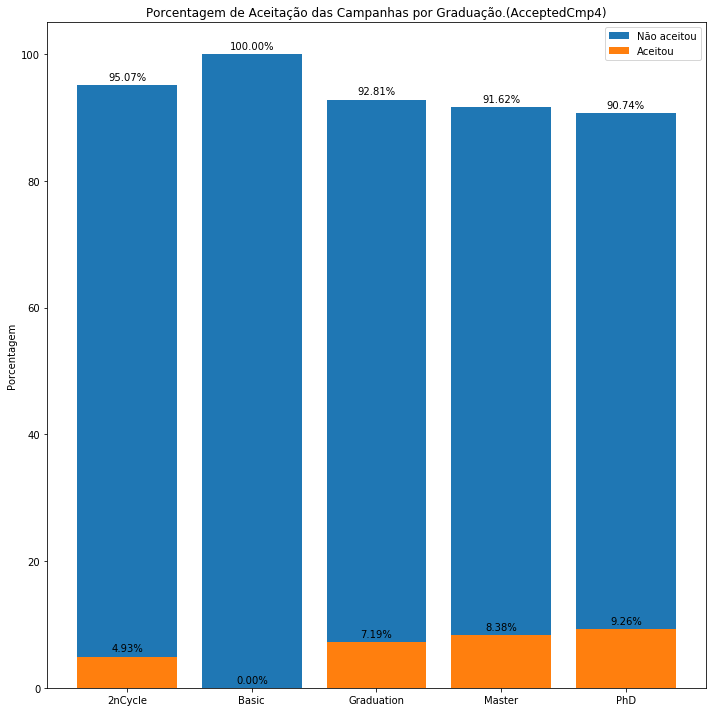

In [45]:
criar_grafico_por_education(array_data_frame[3], array_data_frame[3].columns, 4)

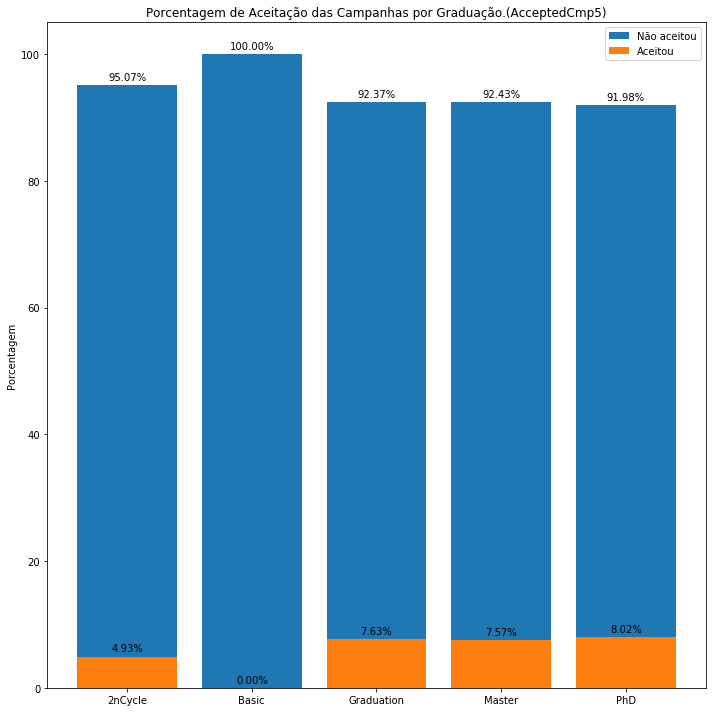

In [46]:
criar_grafico_por_education(array_data_frame[4], array_data_frame[4].columns, 5)

In [145]:
# irá criar um gráfico para gerar as médias das rendas familiares
# por educação

def criar_grafico_por_media(arrayListColumns,dataframe):
    arrayList_values = []
    cont = 0
    fig, axs = plt.subplots(figsize=(15,8))
    
    for i in arrayListColumns:
        arrayList_values.append(dataframe[i][0])

    for x in arrayList_values:
        cont = cont + 1
  
    labels_AcceptedCmp = [i for i in arrayListColumns]
    
    plt.xlabel("Graduações")
    plt.ylabel("Média dos Incomes")
    
    retangulo = axs.bar(labels_AcceptedCmp,arrayList_values, tick_label=labels_AcceptedCmp,label = 'Média')
    
    for r in retangulo:
        altura = r.get_height()
        axs.annotate('{:.2f}'.format(altura),
                     xy =(r.get_x() + r.get_width() / 2 , altura),xytext=(0, 3),textcoords="offset points",
                    ha='center', va='bottom')

In [157]:
dict_means = dict()
array_values = []
columns = array_data_frame[0].columns
count = 0
dict_aux = dict()

df_groupby = camping_marketing.groupby(['Education'])['Income'].mean()

df = pd.DataFrame(df_groupby)

for row, i in df.iterrows():
    array_values.append(i['Income'])
    
for c in columns:
    dict_aux[c] = array_values[count]
    count += 1

In [158]:
df_income_mean_for_education = pd.DataFrame(dict_aux, index=[0])

In [159]:
df_income_mean_for_education

,2n Cycle,Basic,Graduation,Master,PhD
0,47633.19,20306.259259,52720.373656,52917.534247,56145.313929


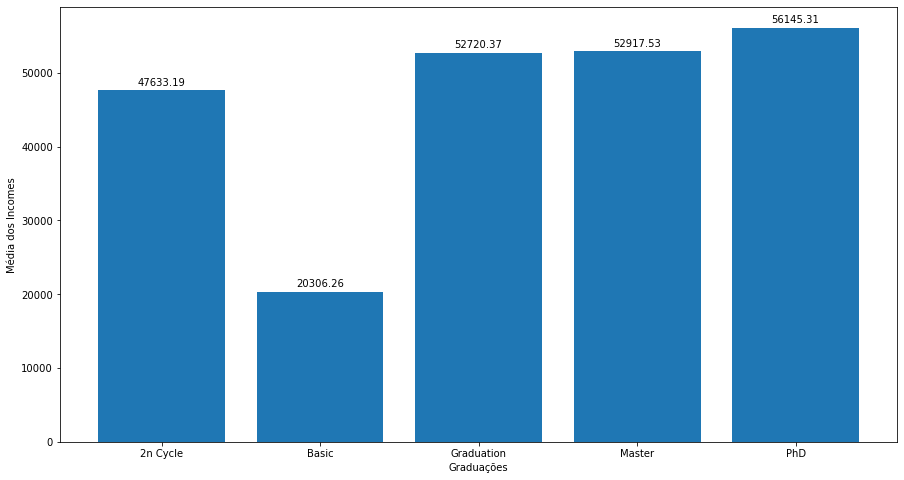

In [150]:
criar_grafico_por_media(array_data_frame[0].columns,df_income_mean_for_education)

In [163]:
# indentificar quem aceitou mais de uma campanha por graduação
campanhas_aceitas_por_id = dict()
array_campanhas = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']
array_aceitacao_por_campanha = []
array_education = []
array_id_cliente_agrupado_por_education = []

df_groupby_temp = camping_marketing.groupby(['Education'])['AcceptedCmp1']

for education, index in df_groupby_temp:
    array_education.append(education)

In [164]:
for row, index in camping_marketing.iterrows():
    for camp in array_campanhas:
        array_aceitacao_por_campanha.append(index[camp])
    
    campanhas_aceitas_por_id[index['ID']] = dict({'Formacao': index['Education'], 'AcceptedCmp':array_aceitacao_por_campanha})
    array_aceitacao_por_campanha = []

In [165]:
campanhas_aceitas_por_id_total = dict()
dict_aux = dict()
dict_id_cliente = dict()

In [166]:
for edu in array_education:
    dict_aux = dict()
    
    for cliente_id in campanhas_aceitas_por_id:
        if edu == campanhas_aceitas_por_id[cliente_id]['Formacao']:
            dict_aux[cliente_id] = campanhas_aceitas_por_id[cliente_id]['AcceptedCmp']
            campanhas_aceitas_por_id_total[campanhas_aceitas_por_id[cliente_id]['Formacao']] = dict_aux

In [167]:
# -- montando o gráfico.

In [168]:
dict_final = dict()
dict_cliente_final = dict()

for edu in array_education:
    total = 0
    flag_aceitou_mais_camp = 0
    
    for cliente_id in campanhas_aceitas_por_id:
        if edu == campanhas_aceitas_por_id[cliente_id]['Formacao']:
            for x in campanhas_aceitas_por_id_total[edu][cliente_id]:
                total += x
            if total > 1:
                flag_aceitou_mais_camp += 1
                
        dict_cliente_final[edu] = flag_aceitou_mais_camp

In [169]:
df = pd.DataFrame(dict_cliente_final, index=['Total'])

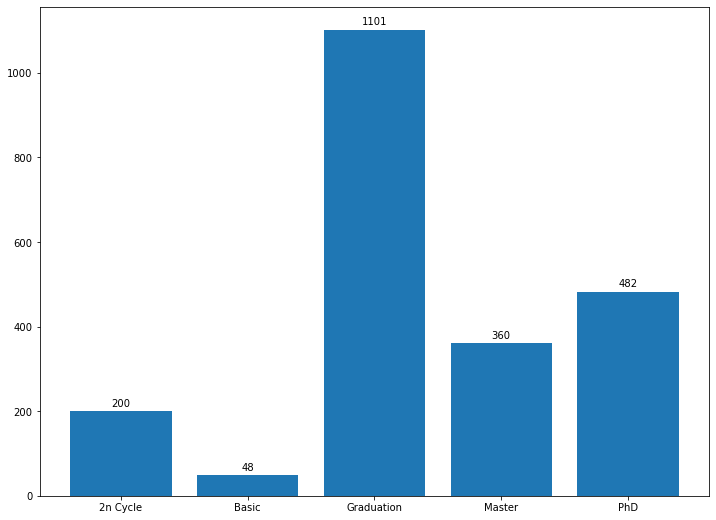

In [170]:
criar_grafico(0, df.columns,df, percent = False)

In [65]:
# Construção do Modelo de Regressão Logística
# Objetivo: prever as aceitações por campanha
# importando as bibliotecas
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [130]:
# Pré-processamento dos dados
education_dummies = pd.get_dummies(camping_marketing["Education"], 
                                   drop_first=True) # Transforma variáveis categóricas em 0 ou 1

Marital_Status_dummies = pd.get_dummies(camping_marketing["Marital_Status"], 
                                            drop_first=True) # Transforma variáveis categóricas em 0 ou 1

# Excluindo colunas que não serão usadas no modelo
campingMarketing_preprocessing = camping_marketing.drop(['ID', 'Year_Birth', 'Income', 'Dt_Customer', 
                        'Recency', 'MntWines', 'Recency','Z_CostContact', 'Z_Revenue', 'Response', 'Complain',
                                                        'Kidhome','Teenhome', 'Marital_Status', 'Education'], axis=1)
# Tratando varáveis escalares
variable_scaleds = campingMarketing_preprocessing.iloc[:,4:9]
variable_scaleds = preprocessing.scale(variable_scaleds)
df_variable_scaleds = pd.DataFrame(variable_scaleds, columns = ['MntFruits','MntMeatProducts', 'MntFishProducts',
                                                               'MntSweetProducts','MntGoldProds'])

campingMarketing_preprocessing = campingMarketing_preprocessing.drop(['MntFruits','MntMeatProducts', 'MntFishProducts',
                                                               'MntSweetProducts','MntGoldProds'], axis=1)

In [67]:
variable_target = campingMarketing_preprocessing['AcceptedCmp1']
campingMarketing_preprocessing = campingMarketing_preprocessing.drop(['AcceptedCmp1'], axis=1)
campingMarketing_preprocessing_AcceptedCmp1 = pd.concat([campingMarketing_preprocessing, education_dummies, 
                                                  Marital_Status_dummies,df_variable_scaleds,variable_target], axis=1)

# separando os dados
X_train, X_test, y_train, y_test = train_test_split(campingMarketing_preprocessing_AcceptedCmp1.drop(['AcceptedCmp1'], axis=1),
                                                    campingMarketing_preprocessing_AcceptedCmp1['AcceptedCmp1'],
                                                    test_size = 0.33)
    
modelo = LogisticRegression() # fazendo a istância do objeto
modelo.fit(X_train, y_train) # treinando o modelo de regressão Logísitica
predict = modelo.predict(X_test) # fazendo a previsão

print(classification_report(y_test, predict)) # AcceptedCmp1

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       690
           1       0.71      0.24      0.36        50

    accuracy                           0.94       740
   macro avg       0.83      0.62      0.66       740
weighted avg       0.93      0.94      0.93       740



C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [131]:
variable_target = campingMarketing_preprocessing['AcceptedCmp2']
campingMarketing_preprocessing = campingMarketing_preprocessing.drop(['AcceptedCmp2'], axis=1)
campingMarketing_preprocessing_AcceptedCmp2 = pd.concat([campingMarketing_preprocessing, education_dummies, 
                                                  Marital_Status_dummies,df_variable_scaleds,variable_target], axis=1)
# separando os dados
X_train, X_test, y_train, y_test = train_test_split(campingMarketing_preprocessing_AcceptedCmp2.drop(['AcceptedCmp2'], axis=1),
                                                    campingMarketing_preprocessing_AcceptedCmp2['AcceptedCmp2'],
                                                    test_size = 0.40)
    
model = LogisticRegression() # fazendo a istância do objeto
model.fit(X_train, y_train) # treinando o modelo de regressão Logísitica
predict = model.predict(X_test) # fazendo a previsão

print(classification_report(y_test, predict)) # AcceptedCmp2

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       882
           1       0.50      0.07      0.12        14

    accuracy                           0.98       896
   macro avg       0.74      0.54      0.56       896
weighted avg       0.98      0.98      0.98       896



C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
variable_target = campingMarketing_preprocessing['AcceptedCmp3']
campingMarketing_preprocessing = campingMarketing_preprocessing.drop(['AcceptedCmp3'], axis=1)
campingMarketing_preprocessing_AcceptedCmp3 = pd.concat([campingMarketing_preprocessing, education_dummies, 
                                                  Marital_Status_dummies,df_variable_scaleds,variable_target], axis=1)

# separando os dados
X_train, X_test, y_train, y_test = train_test_split(campingMarketing_preprocessing_AcceptedCmp3.drop(['AcceptedCmp3'], axis=1),
                                                    campingMarketing_preprocessing_AcceptedCmp3['AcceptedCmp3'],
                                                    test_size = 0.33)
    
model = LogisticRegression() # fazendo a istância do objeto
model.fit(X_train, y_train) # treinando o modelo de regressão Logísitica
predict = model.predict(X_test) # fazendo a previsão

print(classification_report(y_test, predict)) # AcceptedCmp3

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       690
           1       0.33      0.04      0.07        50

    accuracy                           0.93       740
   macro avg       0.63      0.52      0.52       740
weighted avg       0.89      0.93      0.90       740



C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
variable_target = campingMarketing_preprocessing['AcceptedCmp4']
campingMarketing_preprocessing = campingMarketing_preprocessing.drop(['AcceptedCmp4'], axis=1)
campingMarketing_preprocessing_AcceptedCmp4 = pd.concat([campingMarketing_preprocessing, education_dummies, 
                                                  Marital_Status_dummies,df_variable_scaleds,variable_target], axis=1)

# separando os dados
X_train, X_test, y_train, y_test = train_test_split(campingMarketing_preprocessing_AcceptedCmp4.drop(['AcceptedCmp4'], axis=1),
                                                    campingMarketing_preprocessing_AcceptedCmp4['AcceptedCmp4'],
                                                    test_size = 0.33)
    
model = LogisticRegression() # fazendo a istância do objeto
model.fit(X_train, y_train) # treinando o modelo de regressão Logísitica
predict = model.predict(X_test) # fazendo a previsão

print(classification_report(y_test, predict)) # AcceptedCmp4

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       683
           1       0.50      0.14      0.22        57

    accuracy                           0.92       740
   macro avg       0.72      0.56      0.59       740
weighted avg       0.90      0.92      0.90       740



C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [71]:
variable_target = campingMarketing_preprocessing['AcceptedCmp5']
campingMarketing_preprocessing = campingMarketing_preprocessing.drop(['AcceptedCmp5'], axis=1)
campingMarketing_preprocessing_AcceptedCmp5 = pd.concat([campingMarketing_preprocessing, education_dummies, 
                                                  Marital_Status_dummies,df_variable_scaleds,variable_target], axis=1)

# separando os dados
X_train, X_test, y_train, y_test = train_test_split(campingMarketing_preprocessing_AcceptedCmp5.drop(['AcceptedCmp5'], axis=1),
                                                    campingMarketing_preprocessing_AcceptedCmp5['AcceptedCmp5'],
                                                    test_size = 0.33)
    
model = LogisticRegression() # fazendo a istância do objeto
model.fit(X_train, y_train) # treinando o modelo de regressão Logísitica
predict = model.predict(X_test) # fazendo a previsão

print(classification_report(y_test, predict)) # AcceptedCmp5

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       677
           1       0.43      0.05      0.09        63

    accuracy                           0.91       740
   macro avg       0.67      0.52      0.52       740
weighted avg       0.88      0.91      0.88       740



C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [76]:
# Construção do Modelo de Classificação KNN
# importando as bibliotecas

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
scaler.fit(campingMarketing_preprocessing_AcceptedCmp1.drop(['AcceptedCmp1'], axis=1))

df_normalizado_AcceptedCmp1 = scaler.transform(campingMarketing_preprocessing_AcceptedCmp1.drop(['AcceptedCmp1'], axis=1))

df_normalizado_AcceptedCmp1_param = pd.DataFrame(df_normalizado_AcceptedCmp1, columns = 
                                                  campingMarketing_preprocessing_AcceptedCmp1.drop(['AcceptedCmp1'], 
                                                                                                   axis=1).columns)
# separando os dados
X_train, X_test, y_train, y_test = train_test_split(df_normalizado_AcceptedCmp1_param,
                                                     campingMarketing_preprocessing_AcceptedCmp1['AcceptedCmp1'],
                                                    test_size = 0.33)

In [79]:
def definir_n_neighbors(tam_max_neighbors):
    arrayList_error = []
    
    for i in range(1, tam_max_neighbors):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train) # treinando o modelo
        predict = knn.predict(X_test) # prevendo valores
        arrayList_error.append(np.mean(predict != y_test))
        
    plt.figure(figsize=(14, 8))
    
    return plt.plot(range(1,tam_max_neighbors), arrayList_error, color='blue', linestyle='dashed', marker='o')

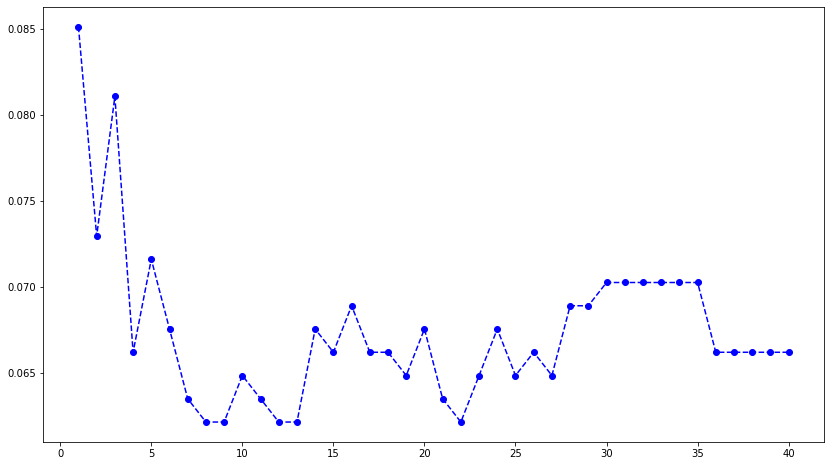

In [80]:
definir_n_neighbors(41)

In [102]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train) # treinando o modelo
predict = knn.predict(X_test) # prevendo valores

In [103]:
# definindo as métricas
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       692
           1       0.75      0.06      0.12        48

    accuracy                           0.94       740
   macro avg       0.84      0.53      0.54       740
weighted avg       0.93      0.94      0.91       740



In [83]:
scaler.fit(campingMarketing_preprocessing_AcceptedCmp5.drop(['AcceptedCmp5'], axis=1))

df_normalizado_AcceptedCmp5 = scaler.transform(campingMarketing_preprocessing_AcceptedCmp5.drop(['AcceptedCmp5'], axis=1))

df_normalizado_AcceptedCmp5_param = pd.DataFrame(df_normalizado_AcceptedCmp5, columns = 
                                                  campingMarketing_preprocessing_AcceptedCmp5.drop(['AcceptedCmp5'], 
                                                                                                   axis=1).columns)
# separando os dados
X_train, X_test, y_train, y_test = train_test_split(df_normalizado_AcceptedCmp5_param,
                                                     campingMarketing_preprocessing_AcceptedCmp5['AcceptedCmp5'],
                                                    test_size = 0.33)

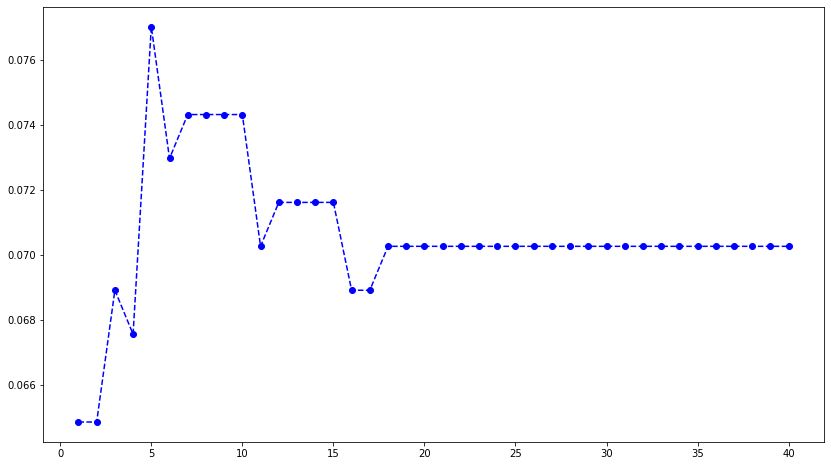

In [84]:
definir_n_neighbors(41)

In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) # treinando o modelo
predict = knn.predict(X_test) # prevendo valores

# definindo as métricas
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       692
           1       0.46      0.27      0.34        48

    accuracy                           0.93       740
   macro avg       0.71      0.62      0.65       740
weighted avg       0.92      0.93      0.92       740



In [86]:
scaler.fit(campingMarketing_preprocessing_AcceptedCmp4.drop(['AcceptedCmp4'], axis=1))

df_normalizado_AcceptedCmp4 = scaler.transform(campingMarketing_preprocessing_AcceptedCmp4.drop(['AcceptedCmp4'], axis=1))

df_normalizado_AcceptedCmp4_param = pd.DataFrame(df_normalizado_AcceptedCmp4, columns = 
                                                  campingMarketing_preprocessing_AcceptedCmp4.drop(['AcceptedCmp4'], 
                                                                                                   axis=1).columns)
# separando os dados
X_train, X_test, y_train, y_test = train_test_split(df_normalizado_AcceptedCmp4_param,
                                                     campingMarketing_preprocessing_AcceptedCmp4['AcceptedCmp4'],
                                                    test_size = 0.33)

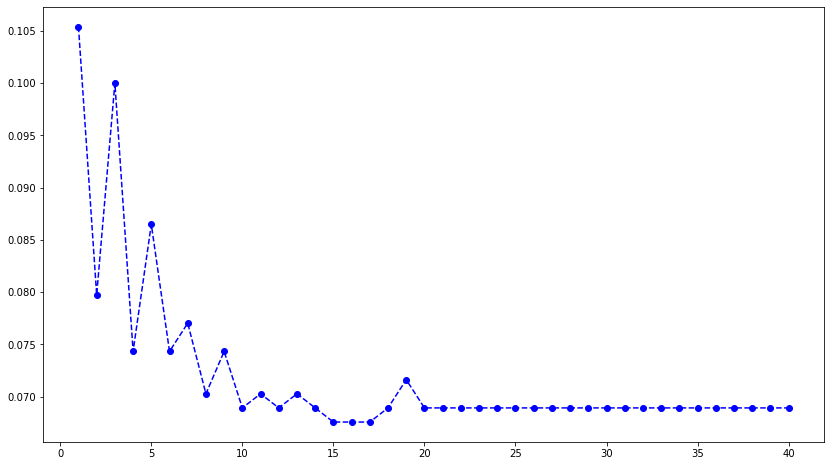

In [87]:
definir_n_neighbors(41)

In [114]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train) # treinando o modelo
predict = knn.predict(X_test) # prevendo valores

# definindo as métricas
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       692
           1       0.55      0.12      0.20        48

    accuracy                           0.94       740
   macro avg       0.74      0.56      0.59       740
weighted avg       0.92      0.94      0.92       740



In [89]:
scaler.fit(campingMarketing_preprocessing_AcceptedCmp3.drop(['AcceptedCmp3'], axis=1))

df_normalizado_AcceptedCmp3 = scaler.transform(campingMarketing_preprocessing_AcceptedCmp3.drop(['AcceptedCmp3'], axis=1))

df_normalizado_AcceptedCmp3_param = pd.DataFrame(df_normalizado_AcceptedCmp3, columns = 
                                                  campingMarketing_preprocessing_AcceptedCmp3.drop(['AcceptedCmp3'], 
                                                                                                   axis=1).columns)
# separando os dados
X_train, X_test, y_train, y_test = train_test_split(df_normalizado_AcceptedCmp3_param,
                                                     campingMarketing_preprocessing_AcceptedCmp3['AcceptedCmp3'],
                                                    test_size = 0.33)

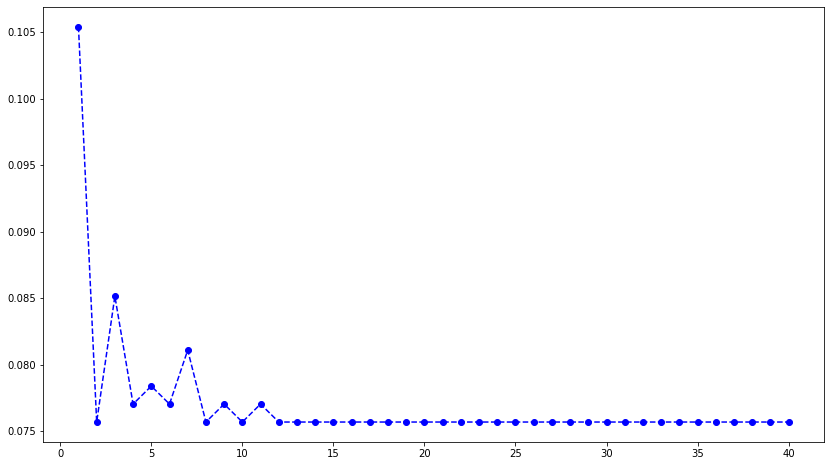

In [90]:
definir_n_neighbors(41)

In [107]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train) # treinando o modelo
predict = knn.predict(X_test) # prevendo valores

# definindo as métricas
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       692
           1       0.77      0.21      0.33        48

    accuracy                           0.94       740
   macro avg       0.86      0.60      0.65       740
weighted avg       0.94      0.94      0.93       740



In [92]:
scaler.fit(campingMarketing_preprocessing_AcceptedCmp2.drop(['AcceptedCmp2'], axis=1))

df_normalizado_AcceptedCmp2 = scaler.transform(campingMarketing_preprocessing_AcceptedCmp2.drop(['AcceptedCmp2'], axis=1))

df_normalizado_AcceptedCmp2_param = pd.DataFrame(df_normalizado_AcceptedCmp2, columns = 
                                                  campingMarketing_preprocessing_AcceptedCmp2.drop(['AcceptedCmp2'], 
                                                                                                   axis=1).columns)
# separando os dados
X_train, X_test, y_train, y_test = train_test_split(df_normalizado_AcceptedCmp2_param,
                                                     campingMarketing_preprocessing_AcceptedCmp2['AcceptedCmp2'],
                                                    test_size = 0.33)

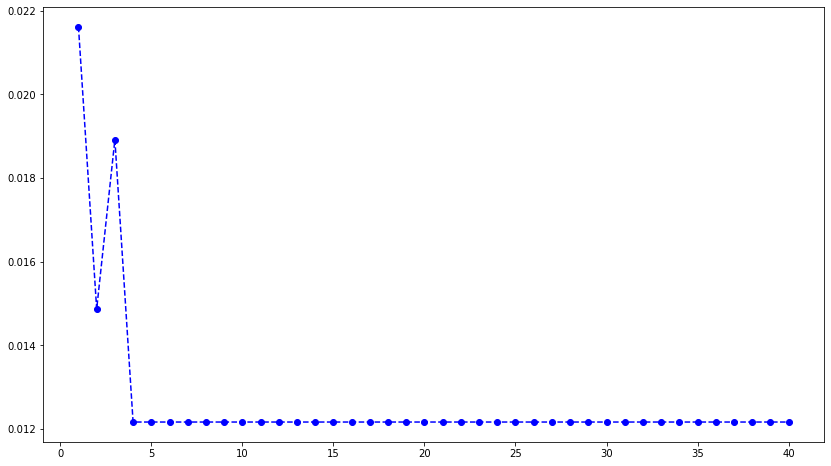

In [93]:
definir_n_neighbors(41)

In [109]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) # treinando o modelo
predict = knn.predict(X_test) # prevendo valores

# definindo as métricas
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       692
           1       0.62      0.31      0.42        48

    accuracy                           0.94       740
   macro avg       0.79      0.65      0.69       740
weighted avg       0.93      0.94      0.93       740



In [95]:
scaler.fit(campingMarketing_preprocessing_AcceptedCmp1.drop(['AcceptedCmp1'], axis=1))

df_normalizado_AcceptedCmp1 = scaler.transform(campingMarketing_preprocessing_AcceptedCmp1.drop(['AcceptedCmp1'], axis=1))

df_normalizado_AcceptedCmp1_param = pd.DataFrame(df_normalizado_AcceptedCmp1, columns = 
                                                  campingMarketing_preprocessing_AcceptedCmp1.drop(['AcceptedCmp1'], 
                                                                                                   axis=1).columns)
# separando os dados
X_train, X_test, y_train, y_test = train_test_split(df_normalizado_AcceptedCmp1_param,
                                                     campingMarketing_preprocessing_AcceptedCmp1['AcceptedCmp1'],
                                                    test_size = 0.33)

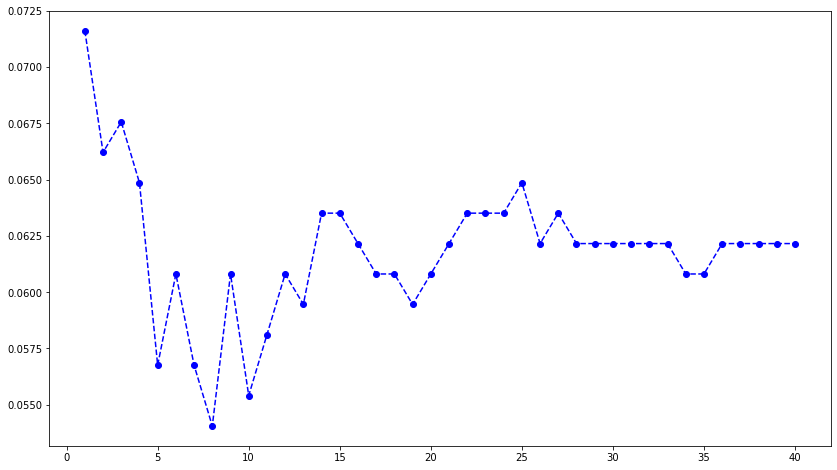

In [96]:
definir_n_neighbors(41)

In [111]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train) # treinando o modelo
predict = knn.predict(X_test) # prevendo valores

# definindo as métricas
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       692
           1       0.80      0.08      0.15        48

    accuracy                           0.94       740
   macro avg       0.87      0.54      0.56       740
weighted avg       0.93      0.94      0.92       740

